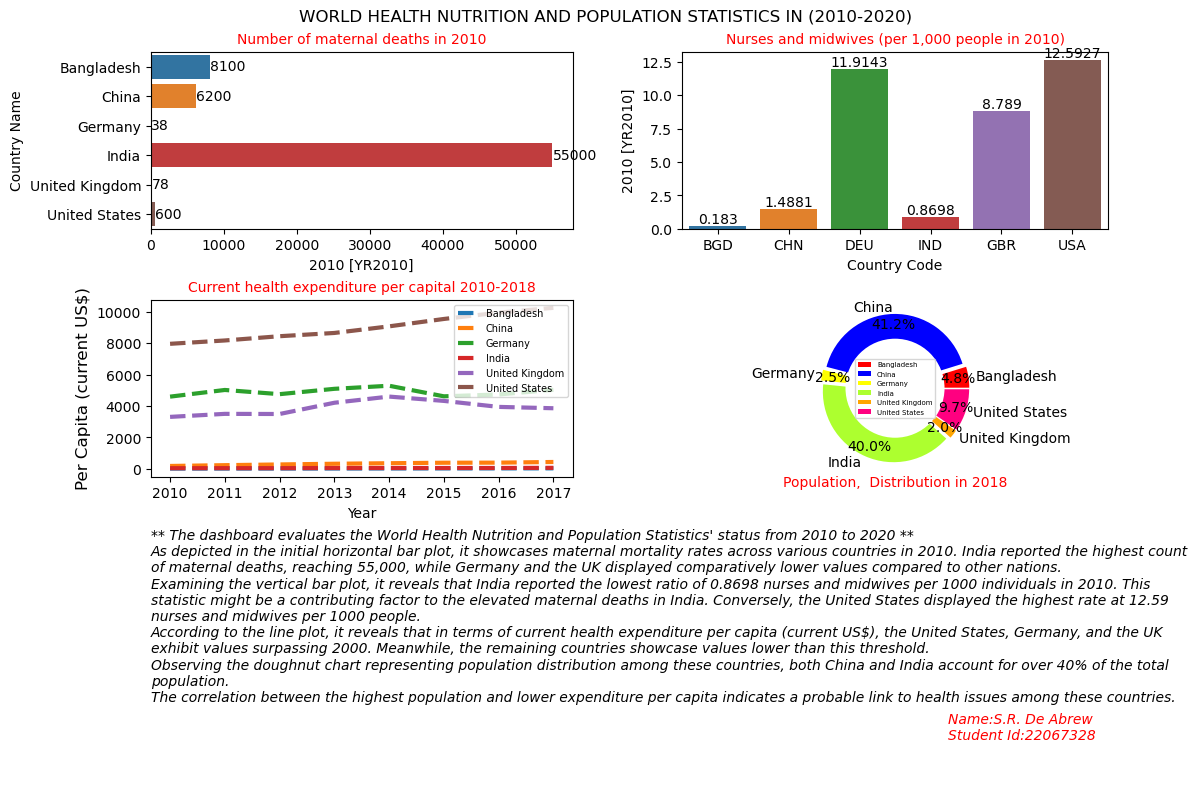

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Tue Jan  9 20:12:27 2024

@author: Savinda De Abrew 

"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# importing data file

who_df = pd.read_csv("World_Health_Nutrition_Statistics.csv")

# Drop Two Columns  2019 [YR2019]','2020 [YR2020]'
who_df_new = who_df.drop(['2019 [YR2019]','2020 [YR2020]'], axis=1)

#################################################################
#################################################################
# Data Pre-Processing 

who_df_new['2010 [YR2010]'] = who_df_new['2010 [YR2010]'].replace('..','0.0')
who_df_new['2011 [YR2011]'] = who_df_new['2011 [YR2011]'].replace('..','0.0')
who_df_new['2012 [YR2012]'] = who_df_new['2012 [YR2012]'].replace('..','0.0')
who_df_new['2013 [YR2013]'] = who_df_new['2013 [YR2013]'].replace('..','0.0')
who_df_new['2014 [YR2014]'] = who_df_new['2014 [YR2014]'].replace('..','0.0')
who_df_new['2015 [YR2015]'] = who_df_new['2015 [YR2015]'].replace('..','0.0')
who_df_new['2016 [YR2016]'] = who_df_new['2016 [YR2016]'].replace('..','0.0')
who_df_new['2017 [YR2017]'] = who_df_new['2017 [YR2017]'].replace('..','0.0')
who_df_new['2018 [YR2018]'] = who_df_new['2018 [YR2018]'].replace('..','0.0')

##########################
# Conver Object type to numeric
who_df_new['2010 [YR2010]'] = pd.to_numeric(who_df_new['2010 [YR2010]'])
who_df_new['2011 [YR2011]'] = pd.to_numeric(who_df_new['2011 [YR2011]'])
who_df_new['2012 [YR2012]'] = pd.to_numeric(who_df_new['2012 [YR2012]'])
who_df_new['2013 [YR2013]'] = pd.to_numeric(who_df_new['2013 [YR2013]'])
who_df_new['2014 [YR2014]'] = pd.to_numeric(who_df_new['2014 [YR2014]'])
who_df_new['2015 [YR2015]'] = pd.to_numeric(who_df_new['2015 [YR2015]'])
who_df_new['2016 [YR2016]'] = pd.to_numeric(who_df_new['2016 [YR2016]'])
who_df_new['2017 [YR2017]'] = pd.to_numeric(who_df_new['2017 [YR2017]'])
who_df_new['2018 [YR2018]'] = pd.to_numeric(who_df_new['2018 [YR2018]'])

#####################
# Drop The NaN
who_df_new1=who_df_new
who_df_new1=who_df_new1.dropna()


country=['Bangladesh','India','China','United Kingdom','Germany', 'United States']


# Filter data Acccording to the country List 
filtered_data = who_df_new1[who_df_new1['Country Name'].isin(country)]

# filter Popultion 
filtered_data_pop=filtered_data[filtered_data['Series Code']=='SP.POP.TOTL']

#Filtering Number of neonatal deaths Count 
filtered_data_NMRT=filtered_data[filtered_data['Series Code']=='SH.DTH.NMRT']

#Filtering Number of Number of maternal deaths Count
filtered_data_DTHS=filtered_data[filtered_data['Series Code']=='SH.MMR.DTHS']


#Filtering Nurses and midwives (per 1,000 people) count
filtered_data_NUMW =filtered_data[filtered_data['Series Code']=='SH.MED.NUMW.P3']

#Filtering Current health expenditure per capita (current US$)
filtered_data_CHEX=filtered_data[filtered_data['Series Code']=='SH.XPD.CHEX.PC.CD']


fig = plt.figure(constrained_layout=True ,figsize=(12,8))


#####################################################################
#####################################################################
#prepring data for Data for line plot 
filtered_data_CHEX_dp=filtered_data_CHEX.drop(['Series Name','Series Code','Country Code','2018 [YR2018]'], axis=1)


dict = {'2010 [YR2010]':'2010', '2011 [YR2011]':'2011', '2012 [YR2012]':'2012', '2013 [YR2013]':'2013',
        '2014 [YR2014]':'2014', '2015 [YR2015]':'2015', '2016 [YR2016]':'2016', '2017 [YR2017]':'2017'}
 
# call rename () method
filtered_data_CHEX_dp.rename(columns=dict, inplace=True)

#Set index for Country Name
filtered_data_CHEX_dp.set_index('Country Name',inplace=True)

#Transpose data
filtered_data_CHEX_dp_T=filtered_data_CHEX_dp.T




################################################################
################################################################

fig.suptitle("World Health Nutrition and Population Statistics in (2010-2020)".upper())
gspec = fig.add_gridspec(ncols=4,nrows=8)

 
ax0 = fig.add_subplot(gspec[0:-5,:-2])

ax0.set_title("Number of maternal deaths in 2010",fontsize=10, color='red')

sns.barplot(y='Country Name', x='2010 [YR2010]', data=filtered_data_DTHS , ax=ax0)
ax0.bar_label(ax0.containers[0])

#ax0.axis('off')


#####################################################################

ax1 = fig.add_subplot(gspec[0:-5,2:4])
ax1.set_title("gspc[0,1]")
ax1.set_title("Nurses and midwives (per 1,000 people in 2010)",fontsize=10, color='red')

sns.barplot(x='Country Code', y='2010 [YR2010]', data=filtered_data_NUMW , ax=ax1)
ax1.bar_label(ax1.containers[0])


####################################################################

ax2 = fig.add_subplot(gspec[3:6,:-2])
ax2.set_title("Current health expenditure per capital 2010-2018",fontsize=10, color='red')

filtered_data_CHEX_dp_T.plot.line(fontsize=10,linewidth=3.0,linestyle='--',ax=ax2)
#plt.title(title.upper(),fontsize=20)
plt.xlabel("Year",fontsize=10)
plt.ylabel("Per Capita (current US$)",fontsize=12)
plt.legend(fontsize=7)

#ax1.axis('off')

################################################################

ax3 = fig.add_subplot(gspec[3:6,2:4])
ax3.set_title("Pie Chart")

sizes = filtered_data_pop['2018 [YR2018]']
 
# Setting labels for items in Chart
labels = filtered_data_pop['Country Name']
 
# colors
colors = ['#FF0000', '#0000FF', '#FFFF00', '#ADFF2F', '#FFA500','#FF0080']
 
# explosion
explode = (0.05, 0.05, 0.05, 0.05, 0.05, 0.05 )
 
# Pie Chart
ax3.pie(sizes, colors=colors, labels=labels,
        autopct='%1.1f%%', pctdistance=0.85, 
        explode=explode)
 
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
 
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
 
# Adding Title of chart
plt.title('Population,  Distribution in 2018' ,fontsize=10, color='red',y=-0.1)
 
# Add Legends
plt.legend(labels, loc=10,fontsize=5)

###############################################

#ax4 = fig.add_subplot(gspec[6:-1,:])
ax4 = fig.add_subplot(gspec[6:7,:])
#ax4.set_title("Brief Description 1 ")
# create a scatter plot
#ax4.plot(y,x)


t4 = ("** The dashboard evaluates the World Health Nutrition and Population Statistics' status from 2010 to 2020 **"
      "\n"
      "As depicted in the initial horizontal bar plot, it showcases maternal mortality rates across various countries in 2010. India reported the highest count of maternal deaths, reaching 55,000, while Germany and the UK displayed comparatively lower values compared to other nations. "
      "\n"
       "Examining the vertical bar plot, it reveals that India reported the lowest ratio of 0.8698 nurses and midwives per 1000 individuals in 2010. This statistic might be a contributing factor to the elevated maternal deaths in India. Conversely, the United States displayed the highest rate at 12.59 nurses and midwives per 1000 people."
      "\n"
      "According to the line plot, it reveals that in terms of current health expenditure per capita (current US$), the United States, Germany, and the UK exhibit values surpassing 2000. Meanwhile, the remaining countries showcase values lower than this threshold. "
      "\n"
      "Observing the doughnut chart representing population distribution among these countries, both China and India account for over 40% of the total population."
    "\n"
    "The correlation between the highest population and lower expenditure per capita indicates a probable link to health issues among these countries."
    )
    


ax4.text(0.0, 1.0, t4, fontsize=10,  style='oblique', va='top', wrap=True, transform=ax4.transAxes
         
         )

ax4.axis('off')

#plt.show()

ax5 = fig.add_subplot(gspec[7:,3:4])
#ax5.set_title("Brief Description 2 ")

t5 = ("Name:"
      "S.R. De Abrew"
      "\n"
      "Student Id:"
      "22067328")

ax5.text(0.0, 1.0, t5, fontsize=10, style='oblique', va='bottom', color='red', wrap=True)

ax5.axis('off')

#plt.savefig("22067328.png", dpi=300)
plt.show()


